In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from preamble import *

In [3]:
from sklearn.datasets import load_files

In [4]:
reviews_train=load_files("aclImdb/train")

In [5]:
text_train,y_train=reviews_train.data,reviews_train.target
print("type of text train : {}".format(type(text_train)))
print("length of text train:{}",format(len(text_train)))
print("text_train[6]: \n{}".format(text_train[6]))

type of text train : <class 'list'>
length of text train:{} 25000
text_train[6]: 
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [6]:
text_train=[doc.replace(b"<br />",b" ") for doc in text_train]

In [7]:
print("text_train[6]: \n{}".format(text_train[6]))

text_train[6]: 
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [8]:
np.unique(y_train)

array([0, 1])

In [9]:
print("Sample per class (training): {}".format(np.bincount(y_train)))

Sample per class (training): [12500 12500]


In [10]:
reviews_test=load_files("aclImdb/test/")

In [11]:
text_test,y_test=reviews_test.data,reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Sample per class (test): {}".format(np.bincount(y_test)))
text_test=[doc.replace(b"<br />",b" ") for doc in text_test]

Number of documents in test data: 25000
Sample per class (test): [12500 12500]


In [12]:
#Bag of word

In [13]:
bards_words=["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
print("Vocabulary size:{}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size:13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [16]:
bag_of_words=vect.transform(bards_words)

In [17]:
print("bag_of_words:{}".format(repr(bag_of_words)))

bag_of_words:<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [18]:
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [19]:
#Bag of word for dataset

In [20]:
vect=CountVectorizer().fit(text_train)
X_train=vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [21]:
feature_name=vect.get_feature_names()
print("Number of feature:{}".format(len(feature_name)))
print("First 20 feature:\n".format(feature_name[:20]))
print("Feature 20010 to 20030:\n{}".format(feature_name[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_name[::2000]))

Number of feature:74849
First 20 feature:

Feature 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores=cross_val_score(LogisticRegression(),X_train,y_train,cv=5)
print("Mean cross-validation accuray {:.2f}".format(np.mean(scores)))

Mean cross-validation accuray 0.88


In [23]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)

Best cross-validation score:0.89
Best parameters: {'C': 0.1}


In [24]:
X_test=vect.transform(text_test)
print("Test score:{:.2f}".format(grid.score(X_test,y_test)))

Test score:0.88


In [25]:
vect=CountVectorizer(min_df=5).fit(text_train)
X_train=vect.transform(text_train)
print("X_train with min_df:{}".format(repr(X_train)))

X_train with min_df:<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [29]:
feature_name=vect.get_feature_names()
print("First 50 feature:\n{}".format(feature_name[:50]))
print("Feature 20010 to 20030 :\n{}".format(feature_name[20010:20030]))
print("Every 700th feature :\n {}".format(feature_name[::700]))

First 50 feature:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Feature 20010 to 20030 :
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature :
 ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciat

In [30]:
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
print("Best cross_val_score:{:.2f}".format(grid.best_score_))

Best cross_val_score:0.89


In [32]:
#Stop words

In [36]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words:{}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopwords:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words:318
Every 10th stopwords:
['beforehand', 'three', 'whole', 'con', 'through', 'why', 'found', 'much', 'someone', 'himself', 'she', 'hereby', 'herein', 'forty', 'ten', 'side', 'when', 'sixty', 'first', 'bill', 'thereupon', 'own', 'very', 'before', 'how', 'wherever', 'four', 'else', 'until', 'under', 're', 'meanwhile']


In [37]:
vect=CountVectorizer(min_df=5,stop_words="english").fit(text_train)
X_train=vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [38]:
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross_val_score:{:.2f}".format(grid.best_score_))

Best cross_val_score:0.88


In [39]:
#Rescaling the Data with tf-idf


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(TfidfVectorizer(min_df=5,norm=None),LogisticRegression())
param_grid={'logisticregression__C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(pipe,param_grid,cv=5)
grid.fit(text_train,y_train)
print("Best cross_val_score:{:.2f}".format(grid.best_score_))

Best cross_val_score:0.89


In [43]:
vectorizer=grid.best_estimator_.named_steps['tfidfvectorizer']
X_train=vectorizer.transform(text_train)
max_value=X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf=max_value.argsort()
feature_name=np.array(vectorizer.get_feature_names())
print("Feature with lowest tfidf:\n{}".format(feature_name[sorted_by_tfidf[:20]]))
print("Feature with higest tfidf:\n{}".format(feature_name[sorted_by_tfidf[-20:]]))

Feature with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond' 'stinker'
 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing' 'downhill'
 'inane']
Feature with higest tfidf:
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [45]:
sorted_by_idf=np.argsort(vectorizer.idf_)
print("Feature with idf:\n{}".format(feature_name[sorted_by_idf[:100]]))

Feature with idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


In [46]:
#Investigating model coefficients

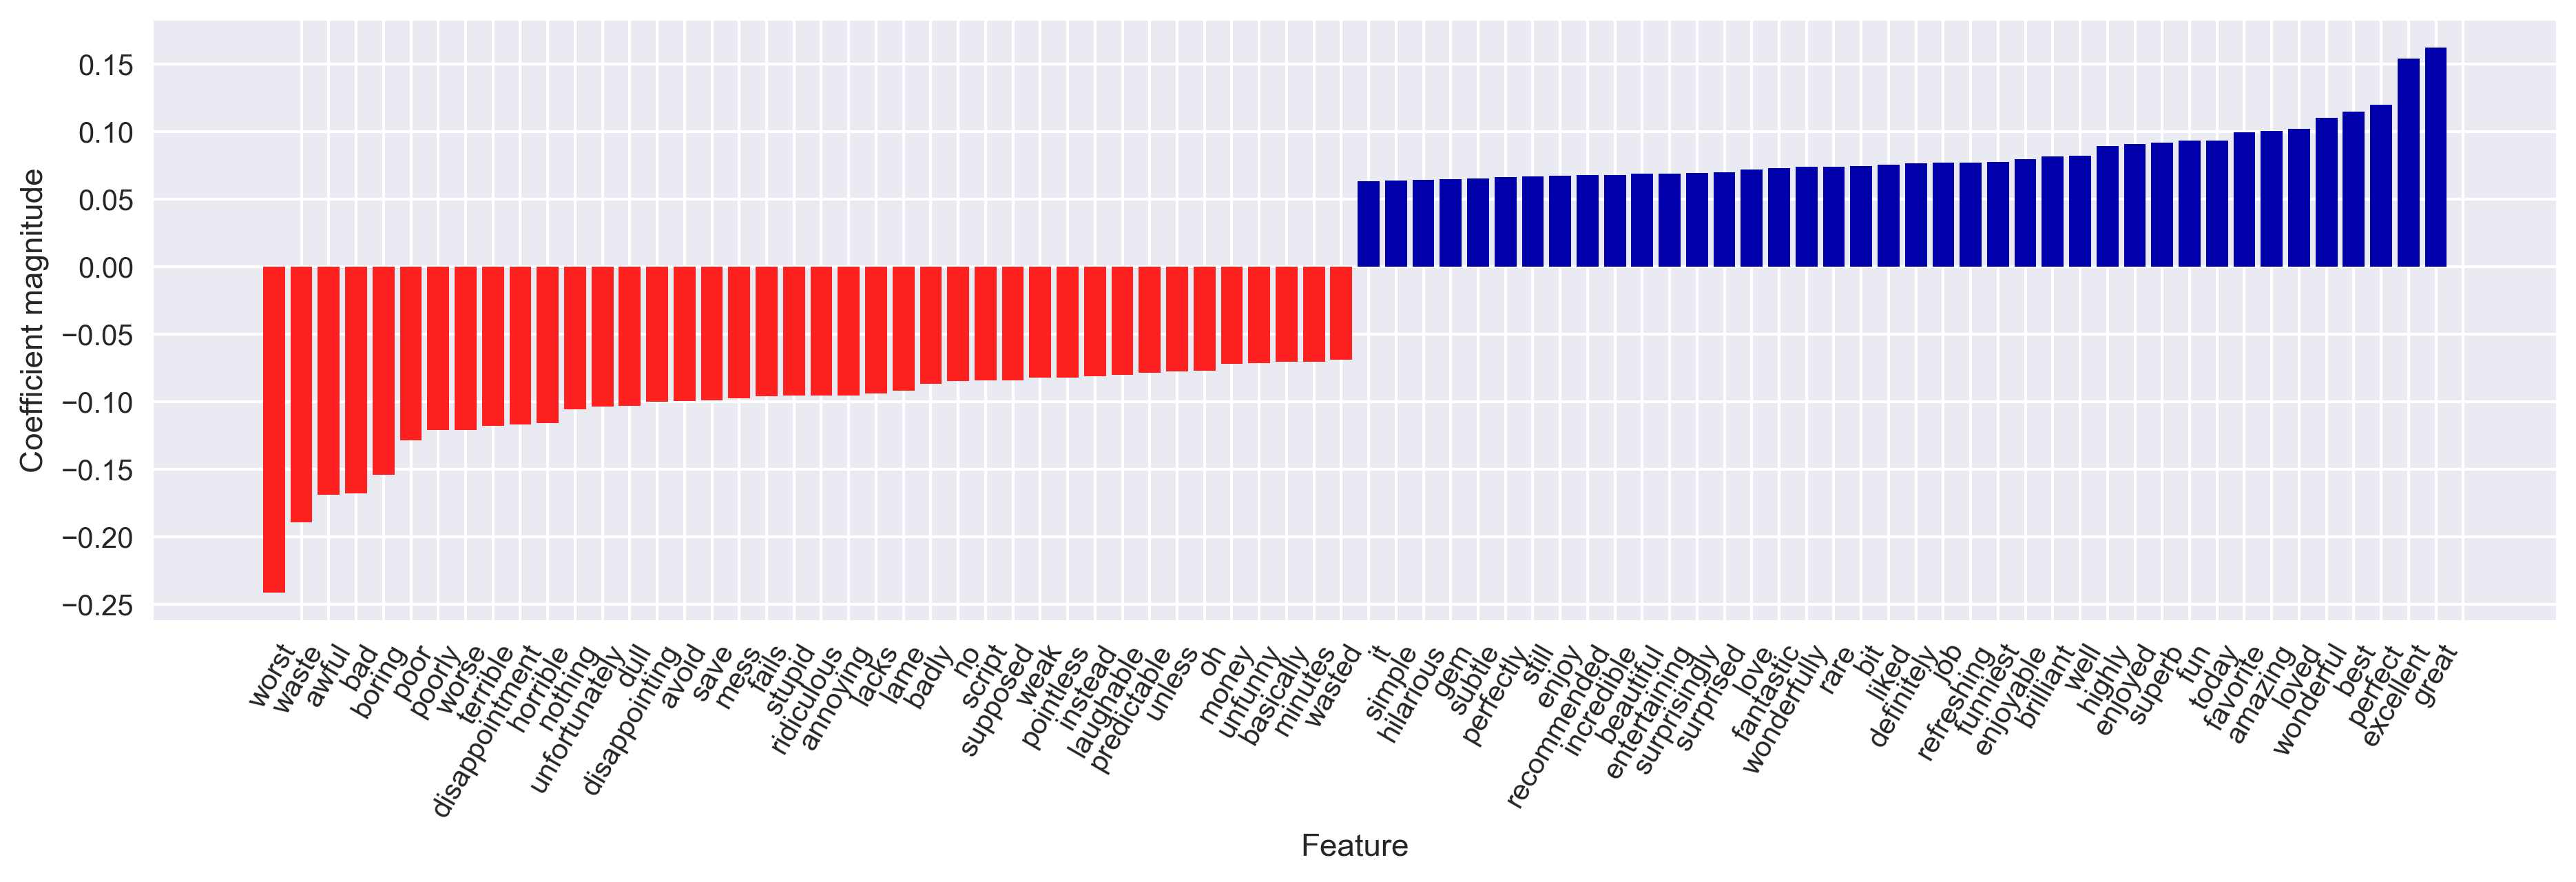

In [47]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,feature_name,n_top_features=40)

In [49]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [51]:
cv=CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print("Vocabulary size:{}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size:13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [52]:
cv=CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print("Vocabulary size:{}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size:14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [54]:
print("Tranformed data(dense):\n{}".format(cv.transform(bards_words).toarray()))

Tranformed data(dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [56]:
cv=CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print("Vocabulary size:{}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size:39
Vocabulary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [57]:
pipe=make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression())
param_grid={'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100],
            "tfidfvectorizer__ngram_range":[(1,1),(1,2),(1,3)]}
grid=GridSearchCV(pipe,param_grid,cv=5)
grid.fit(text_train,y_train)
print("Best cross_val_score:{:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross_val_score:0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


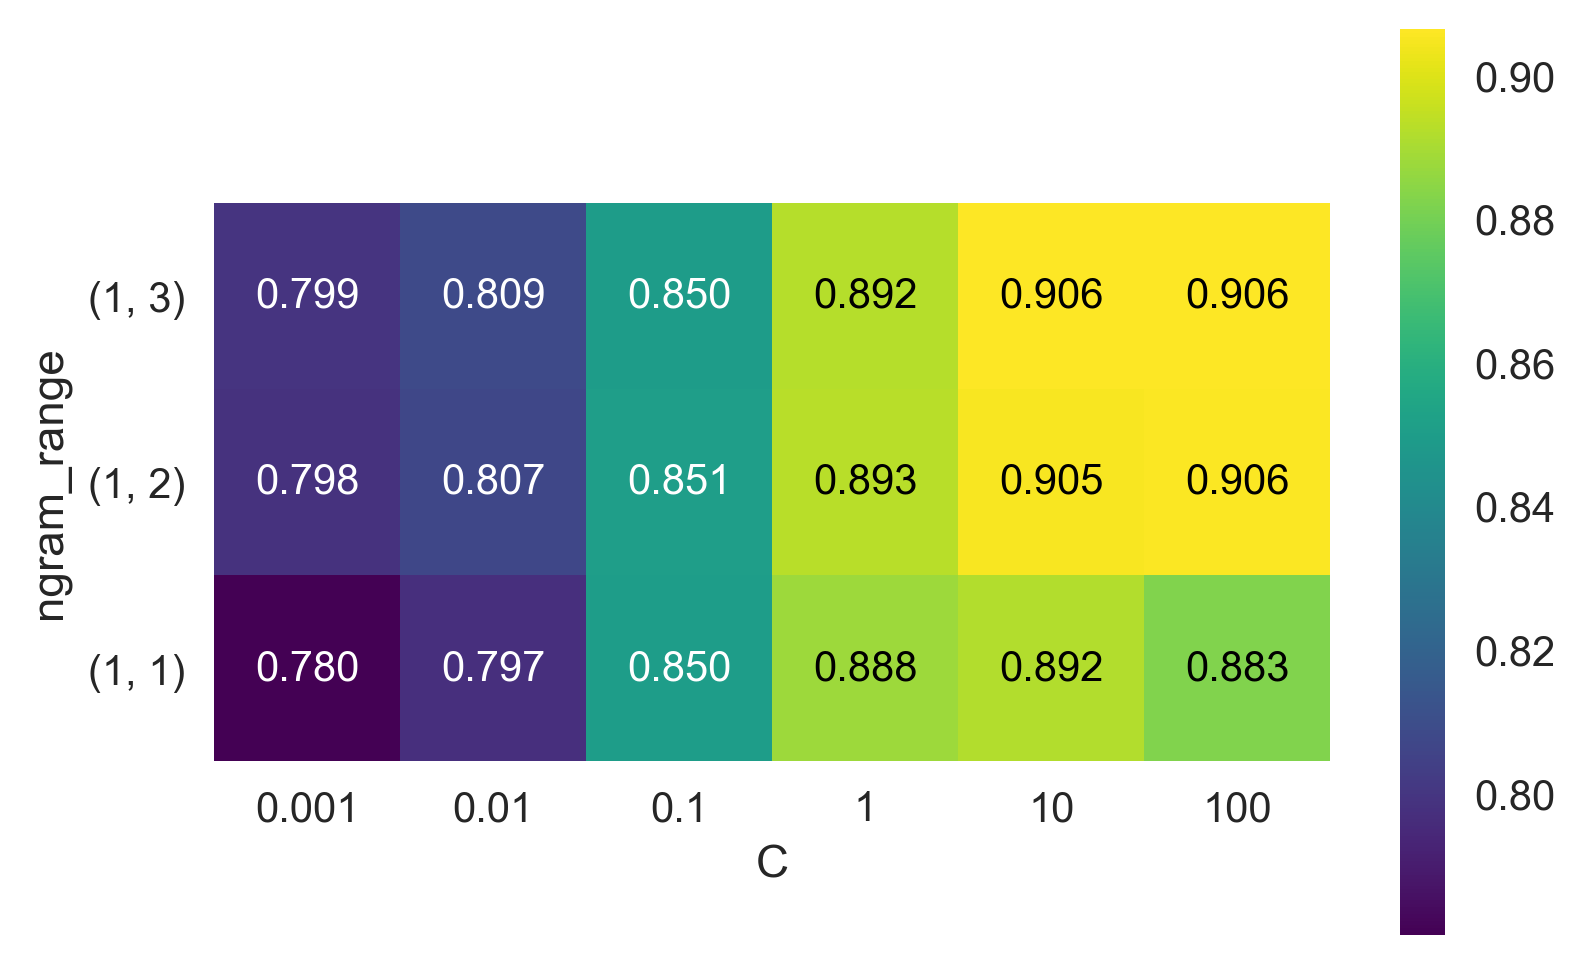

In [58]:
scores=grid.cv_results_['mean_test_score'].reshape(-1,3).T
heatmap=mglearn.tools.heatmap(
        scores,xlabel='C',ylabel='ngram_range',cmap='viridis',fmt='%.3f',
        xticklabels=param_grid['logisticregression__C'],
        yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

(-22, 22)

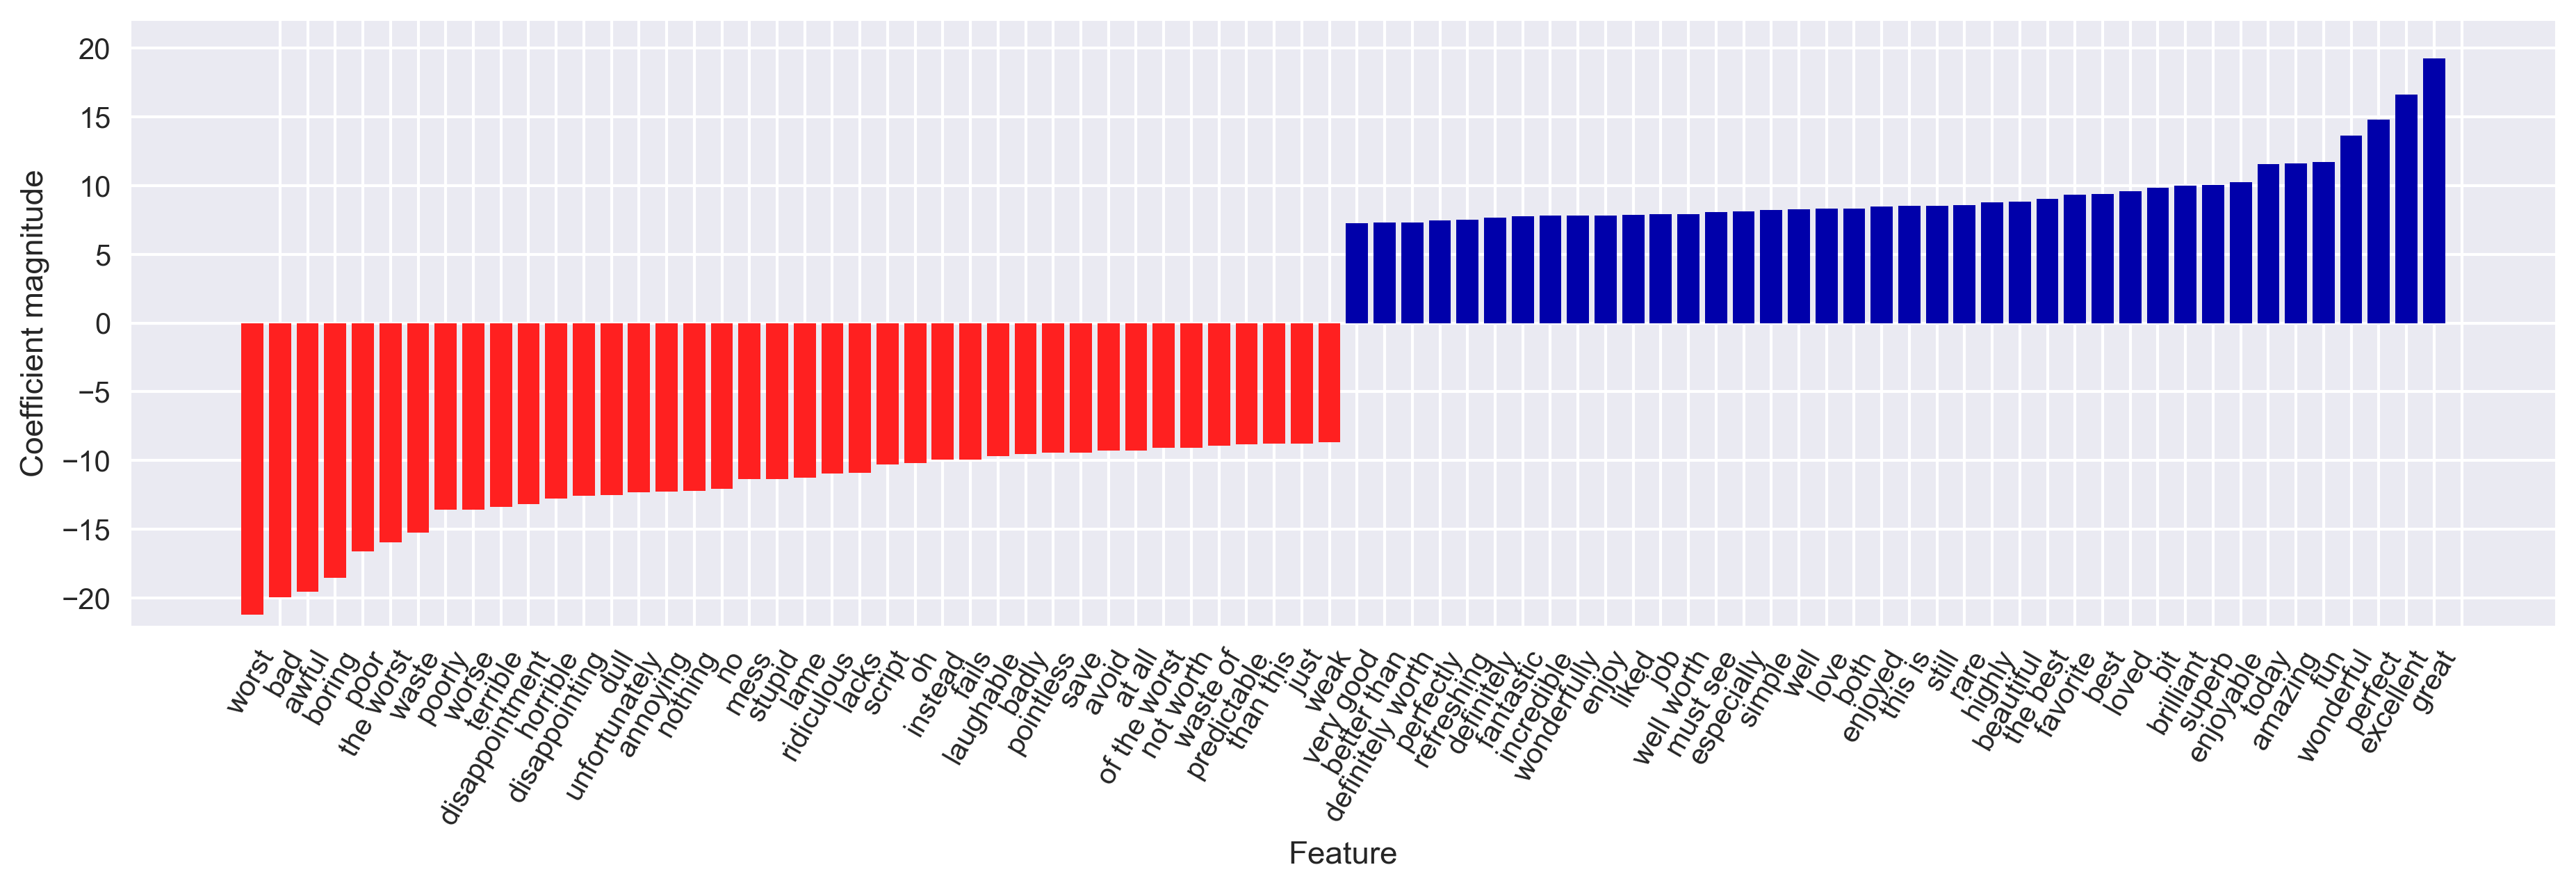

In [59]:
vect=grid.best_estimator_.named_steps['tfidfvectorizer']
feature_name=np.array(vect.get_feature_names())
coef=grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef,feature_name,n_top_features=40)
plt.ylim(-22,22)

(-22, 22)

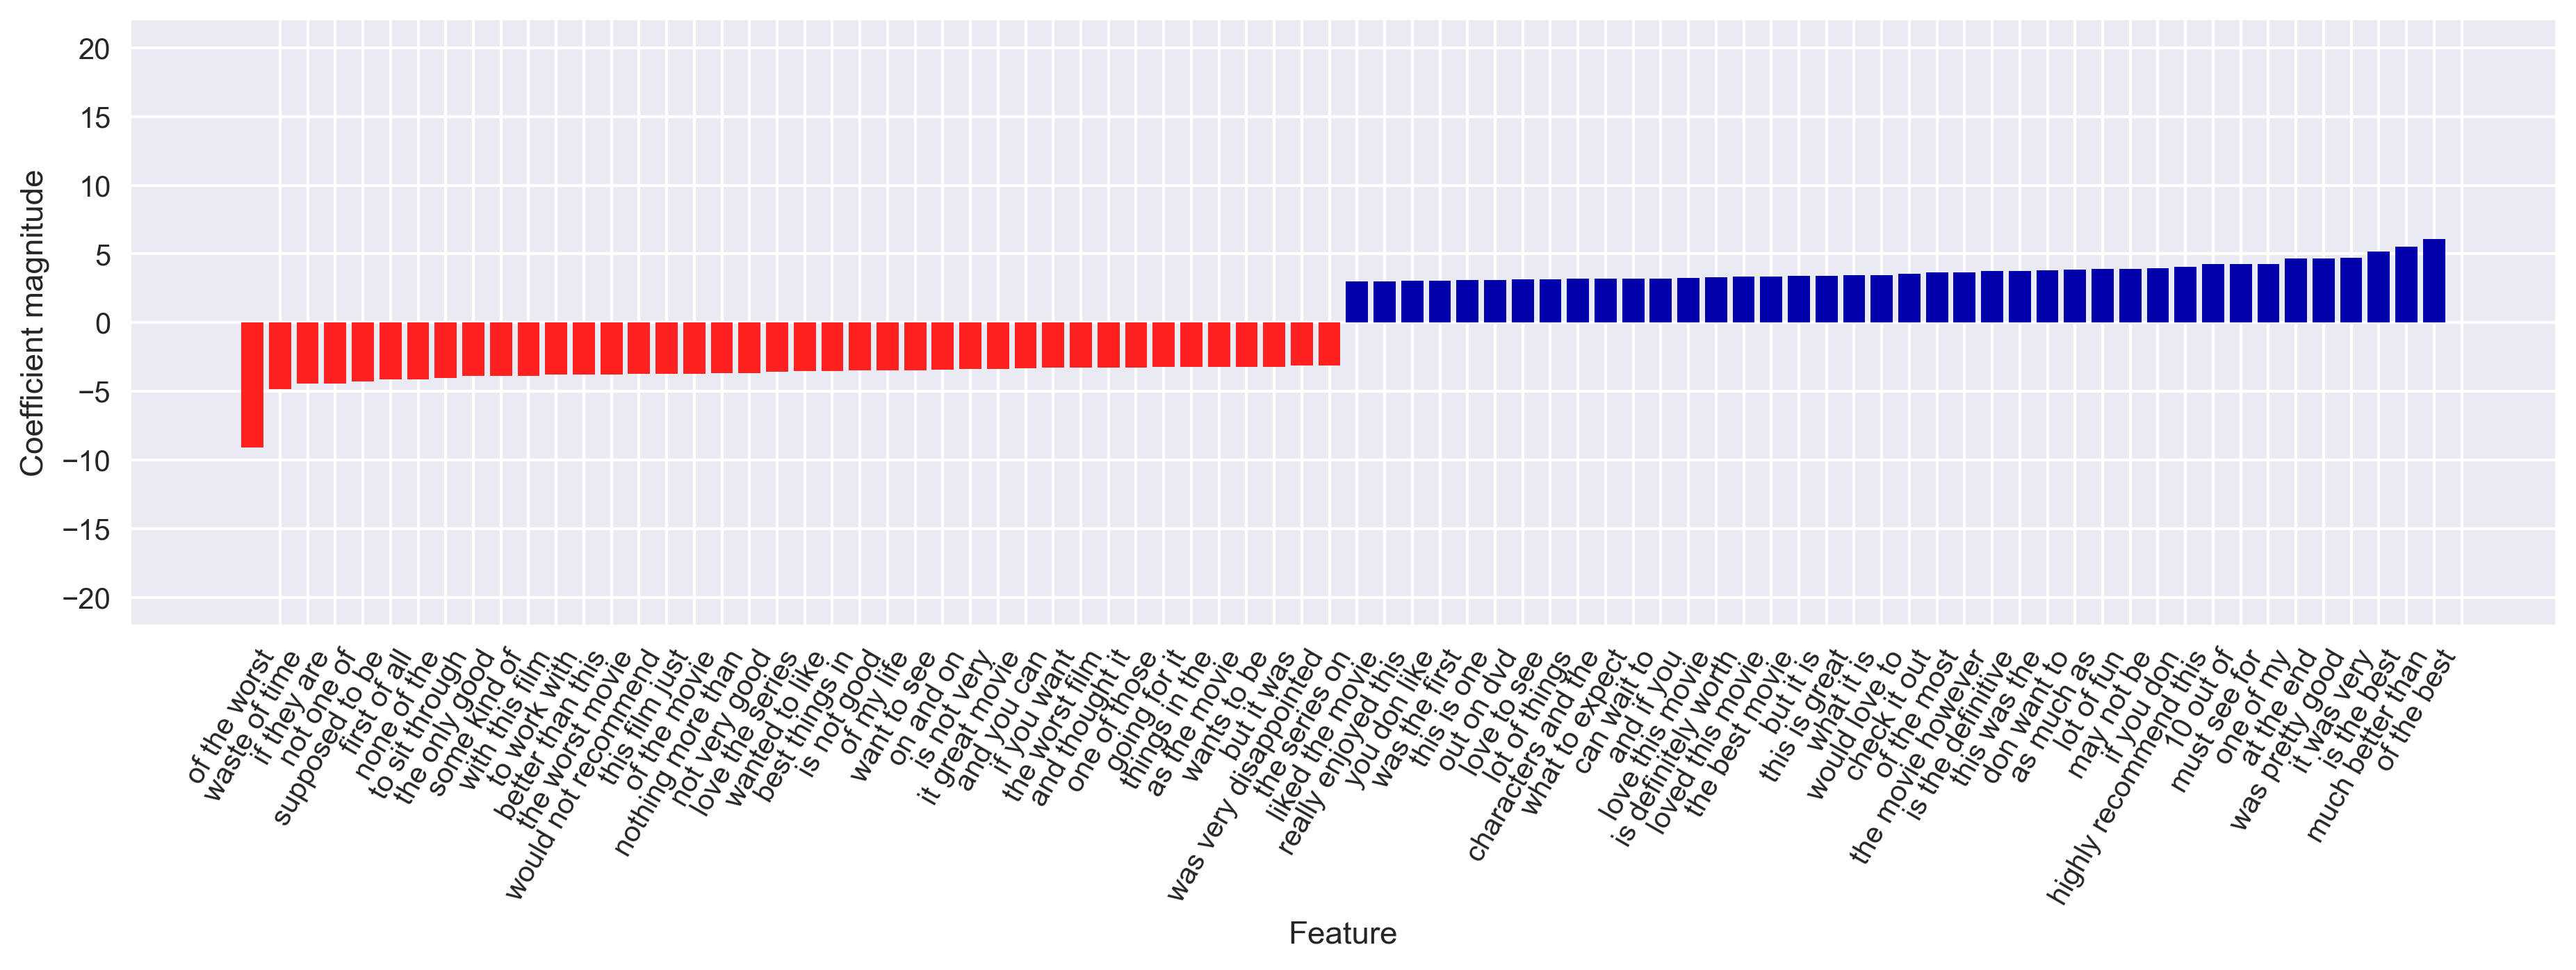

In [62]:
mask=np.array([len(feature.split(" ")) for feature in feature_name])==3
mglearn.tools.visualize_coefficients(coef.ravel()[mask],feature_name[mask],n_top_features=40)
plt.ylim(-22,22)

In [63]:
#Advanced tokenization, stemming and lemmatization

In [66]:
import spacy
import nltk

In [77]:
from spacy.lang.en import English 
en_nlp=spacy.load('en') 
stemmer=nltk.stem.PorterStemmer()

In [78]:
def compare_normalization(doc):
    doc_spacy=en_nlp(doc)
    print('Lemmantization')
    print([token.lemma_ for token in doc_spacy])
    print("Stemming")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [79]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

Lemmantization
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [80]:
import re

In [83]:
regexp=re.compile('(?u)\\b\\w\\w+\\b')
en_nlp=spacy.load('en',disable=['parser','ner'])
old_tokenizer=en_nlp.tokenizer
en_nlp.tokenizer=lambda string:old_tokenizer.tokens_from_list(regexp.findall(string))

def custom_tokenizer(document):
    doc_spacy=en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

lemma_vect=CountVectorizer(tokenizer=custom_tokenizer,min_df=5)